In [5]:
import numpy as np

class StationaryBanditEnv:
    def __init__(self, n_actions):
        self.n_actions = n_actions
        # Fixed reward means each arm has a set reward
        self.true_rewards = np.random.uniform(0, 1, n_actions)  # True rewards for each action
        self.action_counts = np.zeros(n_actions)  # Counts of how many times each action was taken
        self.action_values = np.zeros(n_actions)  # Estimated action values

    def reset(self):
        self.action_counts.fill(0)
        self.action_values.fill(0)

    def step(self, action):
        # Reward is drawn from the true reward of the chosen action
        reward = np.random.normal(self.true_rewards[action], 0.1)  # Add some noise
        return reward

# UCB Action Selection
def ucb_action_selection(env, c=2):
    total_counts = np.sum(env.action_counts)
    ucb_values = []

    for action in range(env.n_actions):
        if env.action_counts[action] == 0:
            # If action has not been selected yet, assign a high value
            ucb_values.append(float('inf'))
        else:
            average_reward = env.action_values[action]
            exploration_term = c * np.sqrt(np.log(total_counts) / env.action_counts[action])
            ucb_values.append(average_reward + exploration_term)

    return np.argmax(ucb_values)

# Create environment
n_actions = 5
env = StationaryBanditEnv(n_actions)

# Run UCB Algorithm
n_iterations = 1000
reward_history = []

env.reset()

for _ in range(n_iterations):
    action = ucb_action_selection(env)
    reward = env.step(action)

    # Update action counts and action values
    env.action_counts[action] += 1
    env.action_values[action] += (reward - env.action_values[action]) / env.action_counts[action]  # Incremental average

    reward_history.append(reward)

# Print true rewards and estimated action values
print("True Rewards:", env.true_rewards)
print("Estimated Action Values:", env.action_values)


True Rewards: [0.11308193 0.85199923 0.9201591  0.71870793 0.42920791]
Estimated Action Values: [0.11431407 0.84656235 0.92038714 0.72907549 0.43210473]


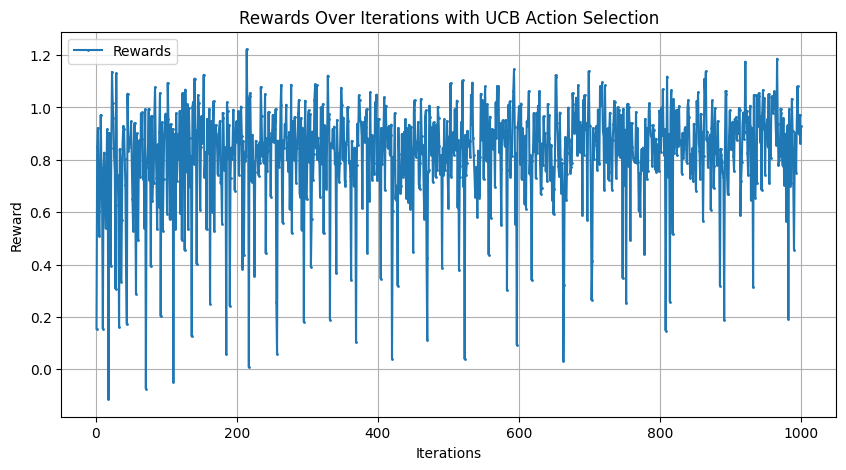

In [6]:
import matplotlib.pyplot as plt

# Plotting the rewards over time
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(reward_history) + 1), reward_history, marker='o', markersize=1, label='Rewards')
plt.title('Rewards Over Iterations with UCB Action Selection')
plt.xlabel('Iterations')
plt.ylabel('Reward')
plt.grid()
plt.legend()
plt.show()
